In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

from glob import glob

In [3]:
os.chdir('C:\Digital Engineering\Gender Detection')

In [4]:
female= glob('./crop/female_crop/*.png')
male= glob('./crop/male_crop/*.png')

In [5]:
female

['./crop/female_crop\\female_0.png',
 './crop/female_crop\\female_1.png',
 './crop/female_crop\\female_100.png',
 './crop/female_crop\\female_1003.png',
 './crop/female_crop\\female_1008.png',
 './crop/female_crop\\female_1009.png',
 './crop/female_crop\\female_1012.png',
 './crop/female_crop\\female_1014.png',
 './crop/female_crop\\female_1017.png',
 './crop/female_crop\\female_102.png',
 './crop/female_crop\\female_1021.png',
 './crop/female_crop\\female_1022.png',
 './crop/female_crop\\female_1024.png',
 './crop/female_crop\\female_1025.png',
 './crop/female_crop\\female_1026.png',
 './crop/female_crop\\female_1027.png',
 './crop/female_crop\\female_1029.png',
 './crop/female_crop\\female_1030.png',
 './crop/female_crop\\female_1032.png',
 './crop/female_crop\\female_1033.png',
 './crop/female_crop\\female_1034.png',
 './crop/female_crop\\female_1035.png',
 './crop/female_crop\\female_1041.png',
 './crop/female_crop\\female_1045.png',
 './crop/female_crop\\female_1046.png',
 './crop

In [7]:
len(male)

2468

In [7]:
path = female + male

In [8]:
path[0]

'./crop/female_crop\\female_0.png'

In [9]:
path[-1]

'./crop/male_crop\\male_999.png'

In [10]:
# getting size of images
def getSize(path):
    img= Image.open(path)
    #since square matrix, using only [0]
    return img.size[0]

Image PIL opens images as (col,row)

In [11]:
getSize(path[10])

273

In [12]:
img= Image.open(path[10])
img.size[1]

273

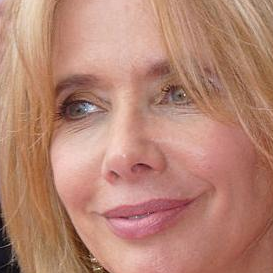

In [13]:
Image.open(path[0])

In [14]:
# Create Data Frame
df = pd.DataFrame(data=path, columns=['path'])
df.head()

,path
0,./crop/female_crop\female_0.png
1,./crop/female_crop\female_1.png
2,./crop/female_crop\female_100.png
3,./crop/female_crop\female_1003.png
4,./crop/female_crop\female_1008.png


In [15]:
df.shape

(6058, 1)

In [16]:
df['size']=df['path'].apply(getSize)
df.head()

,path,size
0,./crop/female_crop\female_0.png,273
1,./crop/female_crop\female_1.png,182
2,./crop/female_crop\female_100.png,182
3,./crop/female_crop\female_1003.png,182
4,./crop/female_crop\female_1008.png,81


## Exploratory Data Aanalyses

In [17]:
df.describe()

,size
count,6058.000000
mean,154.145923
std,71.382174
min,24.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<AxesSubplot:>

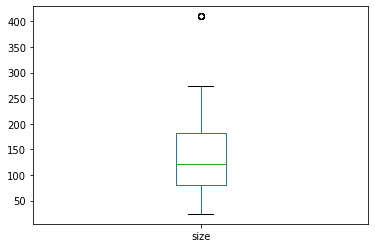

In [18]:
df['size'].plot(kind='box')

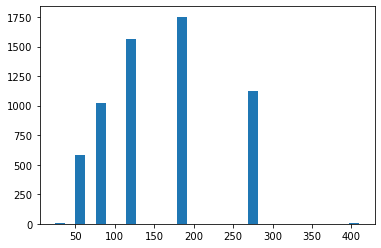

In [19]:
plt.hist(df['size'], bins=30)
plt.show()

Since the image dataset is quite large in our case 6000 images. We will user only those images whose size is greater than 60
which removes almost 500 images from our data. These images can also mislead the model

In [20]:
df_new=df[df['size']>60]
df_new

,path,size
0,./crop/female_crop\female_0.png,273
1,./crop/female_crop\female_1.png,182
2,./crop/female_crop\female_100.png,182
3,./crop/female_crop\female_1003.png,182
4,./crop/female_crop\female_1008.png,81
...,...,...
6053,./crop/male_crop\male_989.png,182
6054,./crop/male_crop\male_99.png,273
6055,./crop/male_crop\male_991.png,122
6056,./crop/male_crop\male_995.png,182


In [21]:
df_new.shape

(5465, 2)

In [22]:
# gender 
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [23]:
df_new['gender']=df_new['path'].apply(gender)

<ipython-input-23-a2a331e70cdc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender']=df_new['path'].apply(gender)


In [24]:
df_new

,path,size,gender
0,./crop/female_crop\female_0.png,273,female
1,./crop/female_crop\female_1.png,182,female
2,./crop/female_crop\female_100.png,182,female
3,./crop/female_crop\female_1003.png,182,female
4,./crop/female_crop\female_1008.png,81,female
...,...,...,...
6053,./crop/male_crop\male_989.png,182,male
6054,./crop/male_crop\male_99.png,273,male
6055,./crop/male_crop\male_991.png,122,male
6056,./crop/male_crop\male_995.png,182,male


<AxesSubplot:>

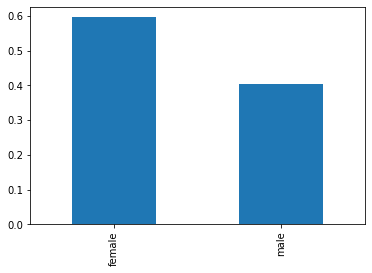

In [25]:
df_new['gender'].value_counts(normalize=True).plot(kind='bar')

50 percent are female and almost 50 percent are male

In [26]:
df_new['size'].min()

81

All the image size are greater than or equal to 81

## Resizing Images

In [27]:
def resize_image(path):
    
    try:
        # step-1: read image
        img=cv2.imread(path)
        # step-2: convert into gray scale
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # step-3: resize into 100*100 array
        size=gray.shape[0]

        if size>=100:
            gray_re= cv2.resize(gray,(100,100),cv2.INTER_AREA) #shrink
        else:
            gray_re= cv2.resize(gray,(100,100),cv2.INTER_CUBIC) #enlarge
        # step 4: flatten image
        return gray_re.flatten()
    
    except:
        return None

In [28]:
df_new['structure_data']= df_new['path'].apply(resize_image)

<ipython-input-28-36cc18b1c904>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data']= df_new['path'].apply(resize_image)


In [29]:
df_new.head()

,path,size,gender,structure_data
0,./crop/female_crop\female_0.png,273,female,"[188, 180, 184, 188, 173, 179, 192, 178, 216, ..."
1,./crop/female_crop\female_1.png,182,female,"[32, 24, 32, 27, 29, 29, 29, 32, 36, 30, 46, 8..."
2,./crop/female_crop\female_100.png,182,female,"[22, 30, 39, 36, 30, 61, 11, 17, 10, 19, 13, 1..."
3,./crop/female_crop\female_1003.png,182,female,"[35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 3..."
4,./crop/female_crop\female_1008.png,81,female,"[86, 86, 71, 54, 45, 49, 33, 20, 18, 23, 27, 2..."


In [30]:
# copy and expand their column
df1 =df_new['structure_data'].apply(pd.Series)

In [31]:
df2=pd.concat((df_new['gender'],df1),axis=1)
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,188,180,184,188,173,179,192,178,216,...,109,111,115,116,122,116,119,120,117,111
1,female,32,24,32,27,29,29,29,32,36,...,58,47,27,33,22,28,22,36,62,17
2,female,22,30,39,36,30,61,11,17,10,...,156,171,177,186,176,185,186,190,177,177
3,female,35,35,35,35,35,35,35,35,35,...,75,82,90,92,86,70,89,84,84,74
4,female,86,86,71,54,45,49,33,20,18,...,35,34,32,32,30,32,34,34,33,30


Text(0.5, 1.0, 'Label: female')

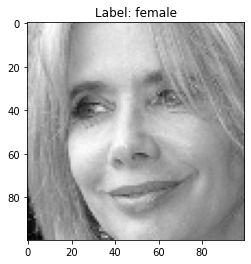

In [32]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'), cmap='gray')
plt.title("Label: "+df2.loc[0]['gender'])

In [33]:
import pickle

In [34]:
pickle.dump(df2,open('dataframe_images_100_100.pickle','wb'))